## Быстрая сортировка (quick sort)

1) выбираем случаный элемент из нашего массива:
x = a[random(0, n-1)]

2) разбиваем массив на 2 части так, что в левой части элементы < x, а в правой >= x

3) затем каждую из частей сортируем отдельно


In [1]:
#Напишем псевдокод:

def quicksort(l, r): # l, r - индексы массива от какого до какого 
    x = a[random(0, n-1)]
    p = partition(l, r, x) # индекс первого элемента >= x
    quicksort(l, p)
    quicksort(p+1, r)

Схема Хоара для partition:

- есть левый и правый указатели
- сначала двигаем левый, пока выполянется условие, что tmp_elem < x --> как только встретили элемент >= x, то переходим к движению правого указателя до тех пор, пока не встретим элемент < x
теперь и правый, и левый указатель указывают на неправильные элементы -> значит, можно их свопнуть (swap)
- делаем так до тех пор, пока l < r

но у эта схема плохо проработана для случаев, когда все элементы в массиве одинаковые, тогда мы войдем в бесконечную рекурсию, так как правая часть всегда будет весь массив, а левая - пустая 

то есть надо делать доп проверки на крайние случаи, поэтому эта схема не так распространена (сложна в реализации) 

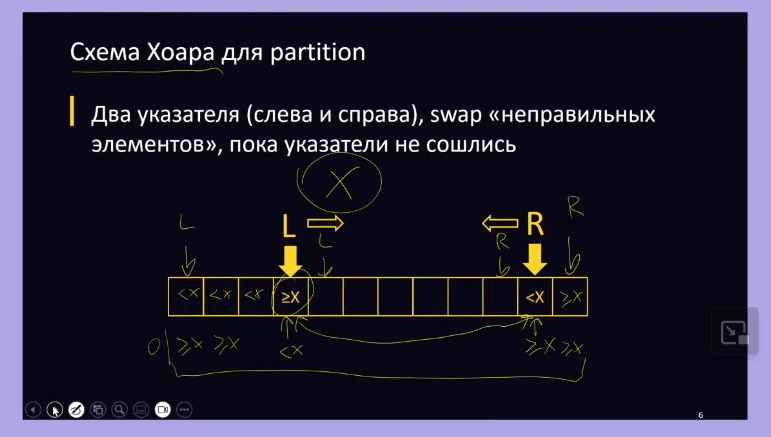


Схема более приближенная к реальной жизни: (основана на 3 указателях)
    
- e - указатель на 1 элемент равный x
- g - указатель на первый элемент больший x
- n - указатель на текущий элемент 

1) I случай: now указывает на элемет < x
надо этот элемент поставить на место, куда указывает equal, a элемент с equal переставить на первый, на ктр указывает greater, а элемент с greater переносим на now + двигаем все указатели на +1 вправо 

2) II случай: now указывает на элемет = x
надо greater свопнуть с now + сдвинуть указатели на +1 вправо (equal не меняется)

3) III случай: now указывает на элемет > x
просто двигаем now на +1


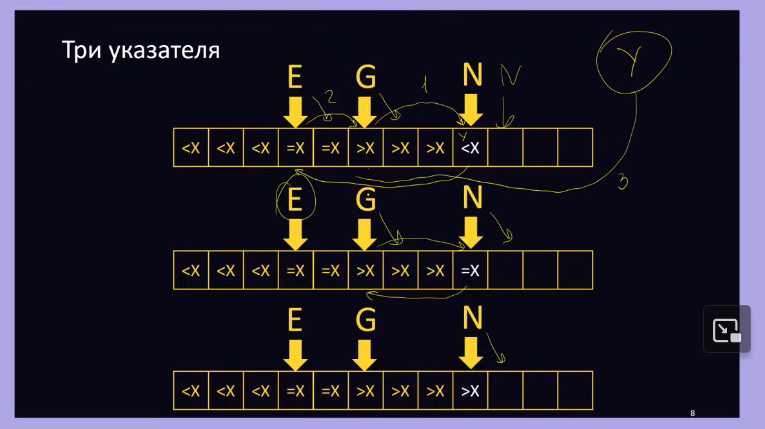

Сложность быстрой сортировки:

1) если x выбрался так, что массив разделился примерно напополам -> O(NlogN)

2) O(N^2) в худшем случае, если x выбрался самым маленьким или самым большим (вероятность такого события очень мала, если мы выбираем x случайно) 

K-ая порядковая статистика 

## Задача А. Partition 

In [38]:
# написать базовый алгоритм partition для быстрой сортировки 
# ктр разбивает набор элементов на две части относительно заданного предиката (условие)
# предикат по условию -> < x

def partition(x, l, r, sp):
    # функция дж возвращать индекс разбиения - индекс на конец части, ктр удовл предикату 
    while l <= r:
        if sp[l] < x:
            l += 1
        else: # sp[l] >= x
            while r >= l:
                if sp[r] >= x:
                    r -= 1
                else: # надо делать обмен "плохих" элементов 
                    sp[l], sp[r] = sp[r], sp[l]
                    l += 1
                    r -= 1
                    break
    return r

n = int(input())
sp = list(map(int, input().split()))
x = int(input()) # опорный элемент (не обязательно встречается в sp!)

rez = partition(x, 0, n-1, sp)
print(sp)
print("Элементов < x:", 1+rez)
print("Элементов >= x:", n-1-rez)

3
5 4 3
3
[5, 4, 3]
Элементов < x: 0
Элементов >= x: 3


## Задача B. Быстрая сортировка

In [1]:
# реализовать быструю сортировку через partition
from random import randint
import sys
sys.setrecursionlimit(10000001)

# из предыдущей задачи 
def partition(x, l, r, sp):
    # функция дж возвращать индекс разбиения - индекс на конец части, ктр удовл предикату 
    while l <= r:
        if sp[l] < x:
            l += 1
        else: # sp[l] >= x
            while r >= l:
                if sp[r] >= x:
                    r -= 1
                else: # надо делать обмен "плохих" элементов 
                    sp[l], sp[r] = sp[r], sp[l]
                    l += 1
                    r -= 1
                    break
    return r

def quicksort(l, r, sp): # l, r - индексы массива от какого до какого 
    if l >= r:
        return 
    ind = randint(l, r)
    x = sp[ind]
    p = partition(x, l, r, sp) # индекс первого элемента >= x
    quicksort(l, p, sp)
    quicksort(p+1, r, sp)

n = int(input())
sp = list(map(int, input().split()))
quicksort(0, n-1, sp)
print(sp)

# эта реализация не работает на >= 2 элементов повторяющихся -> зацикливание рекурсии

10
0 4 5 6 2 3 1 9 8 7
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Реализация Partition через 3 указателя 

In [38]:
# надо сделать так, иначе с 2 указателями мы не можем выбраться из рекурсии,
# если есть хотя бы 2 повторяющихся элемента 

# элементы равные x точно будут (так как это рандомная генерация существующего числа)
# элементов больших чем x мж и не быть 

def partition_3_point(x, l, r, sp):
    # функция дж возвращать индекс разбиения - индекс на конец части, ктр удовл предикату
    if l == r: # если массив из 1 элемента, то сразу выйдем из функции 
        return (-1, r + 1)
    # здесь массивы >= 2 элементов 
    equal = sp.index(x)
    greater = -1
    now = 0
    while now <= r:
        if sp[now] > x:
            greater = now 
            break 
        now += 1
    if greater == -1: # не нашли ни одного элемента > x
        now = equal + 1
        while now <= r:
            if sp[now] < x:
                sp[equal], sp[now] = sp[now], sp[equal]
                equal += 1
            now += 1
        return (equal - 1, r + 1)
    # есть хотя бы 1 элемент больший x
    # эту часть кода надо ПЕРЕПИСАТЬ! 
    if greater < equal: # обязательное условие, что equal левее greater дб 
        sp[equal], sp[greater] = sp[greater], sp[equal] # меняем их местами 
        equal = greater
        # далее надо обновить greater
        now = equal + 1
        while now <= r: # greater точно будет (либо там же, либо раньше)
            if sp[now] > x:
                greater = now
                break
            elif sp[now] < x:
                sp[equal], sp[now] = sp[now], sp[equal]
                equal += 1
            now += 1
        # по итогу нашли новый greater 
        # теперь идем от greater + 1
        now = greater + 1
        while now <= r:
            if sp[now] < x:
                sp[equal] = sp[now]
                sp[now] = sp[greater]
                sp[greater] = x
                equal += 1
                greater += 1
            elif sp[now] == x:
                sp[now] = sp[greater]
                sp[greater] = x
                greater += 1
            now += 1
        return (equal -1, greater)
    # если сразу equal < greater 
    now = equal + 1
    while now < greater:
        if sp[now] < x:
            sp[equal], sp[now] = sp[now], sp[equal]
            equal += 1
        now += 1
    # теперь идем от greater
    now = greater + 1
    while now <= r:
        if sp[now] < x:
            sp[equal] = sp[now]
            sp[now] = sp[greater]
            sp[greater] = x
            equal += 1
            greater += 1
        elif sp[now] == x:
            sp[now] = sp[greater]
            sp[greater] = x
            greater += 1
        now += 1
    return (equal -1, greater)

sp = list(map(int, input().split()))
x = int(input())
p1, p2 = partition_3_point(x, 0, len(sp)-1, sp)
print(sp)
print(p1, p2)

# это длинный partition - не проходит по времени (по итогу в быстрой сортировке)

9 3 4 5 2 7 8 9 0 1
0
[0, 3, 4, 5, 2, 7, 8, 9, 9, 1]
-1 1


In [59]:
from random import randint
import sys
sys.setrecursionlimit(1000001)

def partition_3_point(x, l, r, sp):
    # функция дж возвращать индекс разбиения - индекс на конец части, ктр удовл предикату
    if l == r: # если массив из 1 элемента, то сразу выйдем из функции 
        return (-1, r + 1)
    # здесь массивы >= 2 элементов 
    equal = sp.index(x)
    greater = -1
    now = 0
    while now <= r:
        if sp[now] > x:
            greater = now 
            break 
        now += 1
    if greater == -1: # не нашли ни одного элемента > x
        now = equal + 1
        while now <= r:
            if sp[now] < x:
                sp[equal], sp[now] = sp[now], sp[equal]
                equal += 1
            now += 1
        return (equal - 1, r + 1)
    # есть хотя бы 1 элемент больший x
    # эту часть кода надо ПЕРЕПИСАТЬ! 
    if greater < equal: # обязательное условие, что equal левее greater дб 
        sp[equal], sp[greater] = sp[greater], sp[equal] # меняем их местами 
        equal = greater
        # далее надо обновить greater
        now = equal + 1
        while now <= r: # greater точно будет (либо там же, либо раньше)
            if sp[now] > x:
                greater = now
                break
            elif sp[now] < x:
                sp[equal], sp[now] = sp[now], sp[equal]
                equal += 1
            now += 1
        # по итогу нашли новый greater 
        # теперь идем от greater + 1
        now = greater + 1
        while now <= r:
            if sp[now] < x:
                sp[equal] = sp[now]
                sp[now] = sp[greater]
                sp[greater] = x
                equal += 1
                greater += 1
            elif sp[now] == x:
                sp[now] = sp[greater]
                sp[greater] = x
                greater += 1
            now += 1
        return (equal -1, greater)
    # если сразу equal < greater 
    now = equal + 1
    while now < greater:
        if sp[now] < x:
            sp[equal], sp[now] = sp[now], sp[equal]
            equal += 1
        now += 1
    # теперь идем от greater
    now = greater + 1
    while now <= r:
        if sp[now] < x:
            sp[equal] = sp[now]
            sp[now] = sp[greater]
            sp[greater] = x
            equal += 1
            greater += 1
        elif sp[now] == x:
            sp[now] = sp[greater]
            sp[greater] = x
            greater += 1
        now += 1
    return (equal -1, greater)


def quicksort(l, r, sp): # l, r - индексы массива от какого до какого 
    #quicksort.count += 1
    if l >= r:
        return 
    ind = randint(l, r)
    x = sp[ind]
    p1, p2 = partition_3_point(x, l, r, sp) # индекс первого элемента >= x
    quicksort(l, p1, sp)
    quicksort(p2, r, sp)

n = int(input())
if n != 0:
    sp = list(map(int, input().split()))
    l = 0
    while l < (n-1) and sp[l] <= sp[l+1]:
        l += 1
    if l != (n-1):
        quicksort(0, n-1, sp)
    print(*sp)
    #quicksort.count = 0
    #print(quicksort.count)
else:
    print('')
    
# эта реализация бракованная - TL (10.025, а надо 10с)

10
8 7 0 0 1 3 5 2 9 8 
0 0 1 2 3 5 7 8 8 9


### B. Рабочий код быстрой сортировки 

In [58]:
# переписываю реализацию partition через 3 указателя 

from random import randint 

def partition_3_point_adv(x, l, r, ind, sp):
    # функция дж возвращать индекс разбиения - индекс на конец части, ктр удовл предикату
    if l == r: # если массив из 1 элемента, то сразу выйдем из функции 
        return (-1, r + 1)
    # здесь массивы >= 2 элементов 
    equal = ind
    greater = -1
    now = l
    while now <= r:
        if sp[now] > x:
            greater = now
            break
        now += 1
    sp[l], sp[equal] = sp[equal], sp[l]
    equal = l
    if greater == -1:
        now = l+1
        while now <= r:
            if sp[now] < x:
                sp[equal], sp[now] = sp[now], sp[equal]
                equal += 1
            # если элемент равный, то с ним ничего не делаем 
            now += 1
        return (equal - 1, r + 1)
    # если есть хотя бы 1 больший элемент 
    if greater == l:
        greater = ind 
    sp[l+1], sp[greater] = sp[greater], sp[l+1]
    greater = l+1
    now = l+2
    while now <= r:
        if sp[now] < x:
            sp[equal] = sp[now]
            sp[now] = sp[greater]
            sp[greater] = x
            equal += 1
            greater += 1
        elif sp[now] == x:
            sp[now] = sp[greater]
            sp[greater] = x
            greater += 1
        now += 1
    return (equal -1, greater)

def quicksort(l, r, sp): # l, r - индексы массива от какого до какого 
    if l >= r:
        return 
    ind = randint(l, r)
    x = sp[ind]
    p1, p2 = partition_3_point_adv(x, l, r, ind, sp) # индекс первого элемента >= x
    quicksort(l, p1, sp)
    quicksort(p2, r, sp)

n = int(input())
if n != 0:
    sp = list(map(int, input().split()))
    quicksort(0, n-1, sp)
    print(*sp)
else:
    print('')

# ПРИНЯТО С 1 РАЗА 

1
2
2


'sp = list(map(int, input().split()))\nx = int(input())\np1, p2 = partition_3_point_adv(x, 0, len(sp)-1, 4, sp)\nprint(sp)\nprint(p1, p2)'

## Сортировка слиянием 

## Сложность сортировки 

## Задача C. Слияние 

In [2]:
# реализовать слияние, что используется в сортировке слиянием 

# изначально списки уже отсортированы по неубыванию + надо сохранить устойчивость

def merge(spl, spr):
    n = len(spl)
    m = len(spr)
    rez = [0] *(n + m)
    i = 0
    j = 0
    k = 0
    while i <= n-1 and j <= m-1:
        if spl[i] <= spr[j]:
            rez[k] = spl[i]
            i += 1
        else: # spl[i] > spr[j]
            rez[k] = spr[j]
            j += 1
        k += 1
    if i == n: # добавляем остатки j-ого массива 
        while k < (n + m):
            rez[k] = spr[j]
            k += 1
            j += 1
    elif j == m:
        while k < (n + m):
            rez[k] = spl[i]
            k += 1
            i += 1
    return rez

n = int(input())
spl = list(map(int, input().split()))
m = int(input())
spr = list(map(int, input().split()))

print(*merge(spl, spr))

3
1 3 4
2 
3 6
1 3 3 4 6


## Задача D. Сортировка слиянием 

In [3]:
# разбиваем исходный пополам и для каждого вызываем сортировку слиянием (рекурсивная функция)
# потом делаем merge 

def merge_sort(sp):
    if len(sp) == 1:
        return sp
    spl = merge_sort(sp[0:len(sp)//2])
    spr = merge_sort(sp[len(sp)//2:])
    return merge(spl, spr)

n = int(input())
if n == 0:
    print('')
else:
    sp = list(map(int, input().split()))
    print(*merge_sort(sp))
    
# это рабочий алгоритм сортировки слиянием - принято с 1 раза 

5
1 5 2 4 3
1 2 3 4 5


## Поразрядная сортировка 

= Radix LSD Sort (=least significant digit - сначала меньший разряд/наименее значащая цифра) 

Эта сортировка работает быстрее, чем за O(NlogN), так как НЕ использует вопросы да/нет для сравнения 2 элементов 

Идея:

сортируем устойчиво (с помощью какого-то алгоритма сортировки) числа из одинакового кол-ва цифр сначала по последней цифре, потом к измененному порядку - уже по предпоследней цифре и тд 

Реализуем устойчивую сортировку подсчетом:

если известно, какие числа у нас встречаются (например, только цифры), то мж создать массив - числа индексы, а значения - их кол-во 

Пример:

sp = [1,3,2,3,5,4,1,4,3,5,1,2] - у нас есть 12 оценок с 1 до 5

count = [3,2,3,2,2] - кол-во каждой оценки в массиве

pos = [0, 3, 5, 8, 10] - c какой позиции в массиве начинается та или иная оценка 

(при сортировке - если уже положили какой-то элементв массив, то pos[elem] += 1, в этом и суть!)

(так как это могут быть ключи какой-то большей структуры, где важно сохранять взаимный порядок элементов)

по памяти: O(k) + O(N), где мы храним массив pos и результирующий массив 
по времени: O(N+k), где мы ходим по исходному массиву за O(N), чтобы создать count, потом из него за O(k) делаем pos, потом еще раз за O(N) уже все сортируем в результат 

## Сравнение сортировок 

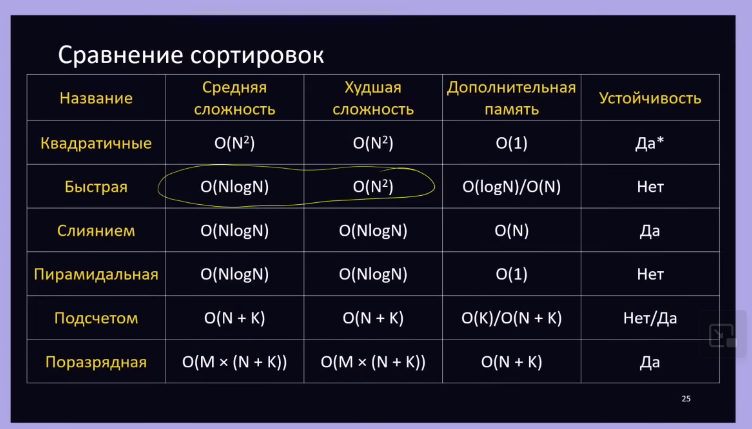

В С++ stable_sort() - сортировка слиянием, sort() - быстрая сортировка 

## Задача E. Поразрядная сортировка 

In [31]:
# на вход подаются строки одинаковой длины (<= 20), состоящие только из цифр от 0 до 9

def count_sort(sp, numb): # numb - по какому разряду сортируем 
    count = [[] for i in range(10)]
    for elem in sp:
        count[int(elem[numb])].append(elem)
    return count
    
# в этой функции будем еще и формировать новый список, чтобы возвращать 
def print_phase(count, numb, n):
    new_sp = ['']*n
    print(f'Phase {numb}')
    k = 0
    for i in range(10):
        tmp_len = len(count[i])
        if  tmp_len == 0:
            print(f"Bucket {i}: empty")
        else: # есть какие-то строки (числа)
            new_str = ''
            for j in range(tmp_len):
                new_str += count[i][j] + ', '
                new_sp[k] = count[i][j] 
                k += 1
            print(f"Bucket {i}: {new_str[0:len(new_str)-2]}")
            #print(f"Bucket {i}: {', '.join(count[i])}")
    print('**********')  
    return new_sp
            
n = int(input())
sp = ['']*n
for i in range(n):
    sp[i] = input()
print('Initial array:')  
print(', '.join(sp))
print('**********')
# фаз столько, сколько чисел в строке 
total = len(sp[0])
for i in range(total):
    # каждый раз нам нужен новый массив 
    count = count_sort(sp, total-1-i)
    sp = print_phase(count, i+1, n)
print('Sorted array:')
print(', '.join(sp))

# принято с 1 раза 

1
678
Initial array:
678
**********
Phase 1
Bucket 0: empty
Bucket 1: empty
Bucket 2: empty
Bucket 3: empty
Bucket 4: empty
Bucket 5: empty
Bucket 6: empty
Bucket 7: empty
Bucket 8: 678
Bucket 9: empty
**********
Phase 2
Bucket 0: empty
Bucket 1: empty
Bucket 2: empty
Bucket 3: empty
Bucket 4: empty
Bucket 5: empty
Bucket 6: empty
Bucket 7: 678
Bucket 8: empty
Bucket 9: empty
**********
Phase 3
Bucket 0: empty
Bucket 1: empty
Bucket 2: empty
Bucket 3: empty
Bucket 4: empty
Bucket 5: empty
Bucket 6: 678
Bucket 7: empty
Bucket 8: empty
Bucket 9: empty
**********
Sorted array:
678
